# E-Commerce Sales Forecasting

## Data Exploration & Cleaning

In [6]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
df = pd.read_csv(r"C:\Users\Ivan\Downloads\Ecommerce_Sales_Prediction_Dataset.csv")
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [8]:
# Menampilkan informasi dasar
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


<bound method NDFrame.describe of            Date Product_Category   Price  Discount Customer_Segment  \
0    01-01-2023           Sports  932.80     35.82       Occasional   
1    02-01-2023             Toys  569.48      3.60          Premium   
2    03-01-2023       Home Decor  699.68      3.56          Premium   
3    04-01-2023             Toys  923.27      0.61          Premium   
4    05-01-2023             Toys  710.17     47.83          Premium   
..          ...              ...     ...       ...              ...   
995  22-09-2025          Fashion  740.06     49.06          Regular   
996  23-09-2025      Electronics  517.10     28.48          Premium   
997  24-09-2025      Electronics  683.43     12.98       Occasional   
998  25-09-2025           Sports   51.26     21.85       Occasional   
999  26-09-2025       Home Decor   93.94     29.68          Regular   

     Marketing_Spend  Units_Sold  
0            6780.38          32  
1            6807.56          16  
2       

In [9]:
# Mengecek missing values
df.isnull().sum()

Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

In [10]:
# Mengecek duplikasi data
df.duplicated().sum()

0

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [12]:
# Cek outlier pada kolom numerik
outliers = df[['Price', 'Discount', 'Marketing_Spend', 'Units_Sold']].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])
outliers

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
1%,22.861300,0.439500,235.382200,14.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
99%,992.243200,49.251500,9895.575300,47.000000
max,999.420000,49.920000,9995.620000,57.000000


## Exploratory Data Analysis

### Analisis Trend Penjualan (Time-Series)

In [15]:
# Group data berdasarkan bulan
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Units_Sold'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

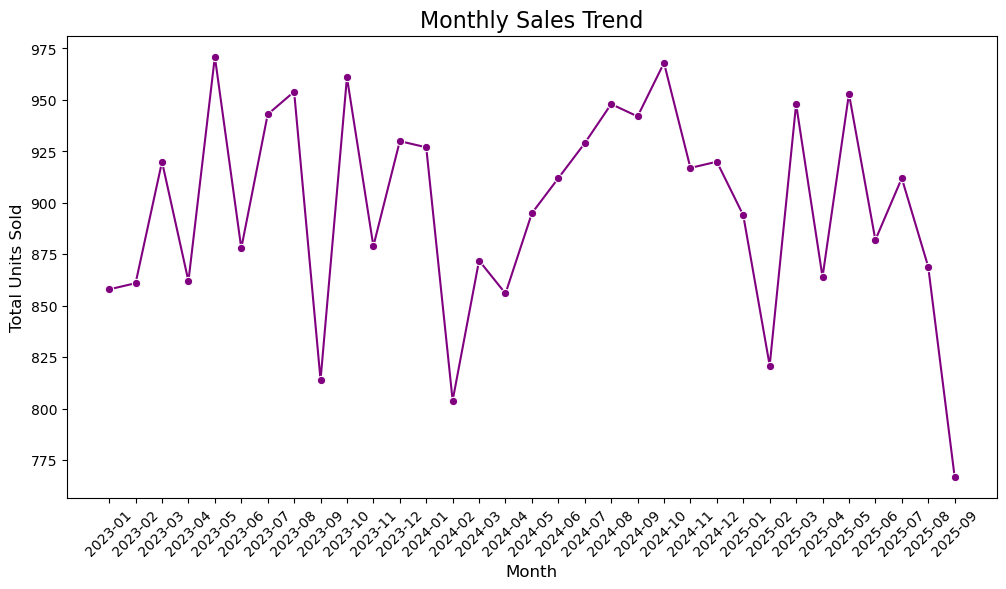

In [16]:
# Visualisasi trend
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Units_Sold', data=monthly_sales, marker='o', color='purple')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Insight:
- Data menunjukkan pola yang cukup fluktuatif dengan banyak naik-turun yang tajam. Ini menunjukkan bahwa total penjualan cenderung tidak stabil dari waktu ke waktu.
- Terdapat beberapa titik puncak di mana penjualan mencapai nilai tertinggi (sekitar 975). Ini bisa jadi menandakan adanya musiman atau event khusus yang mendorong lonjakan penjualan.
- Terlihat ada beberapa penurunan tajam setelah puncak, yang bisa disebabkan oleh (berakhirnya promosi, bergantinya strategi marketing, penurunan permintaan)
- Terdapat periode di mana penjualan mengalami kenaikan bertahap yang konsisten (awal tahun 2024). Ini bisa jadi menandakan adanya strategi pemasaran yang berhasil atau faktor eksternal yang mendukung.
- Di akhir grafik, terlihat tren penurunan tajam. Ini bisa menjadi sinyal peringatan bahwa ada masalah di pasar, supply chain, atau daya beli pelanggan.

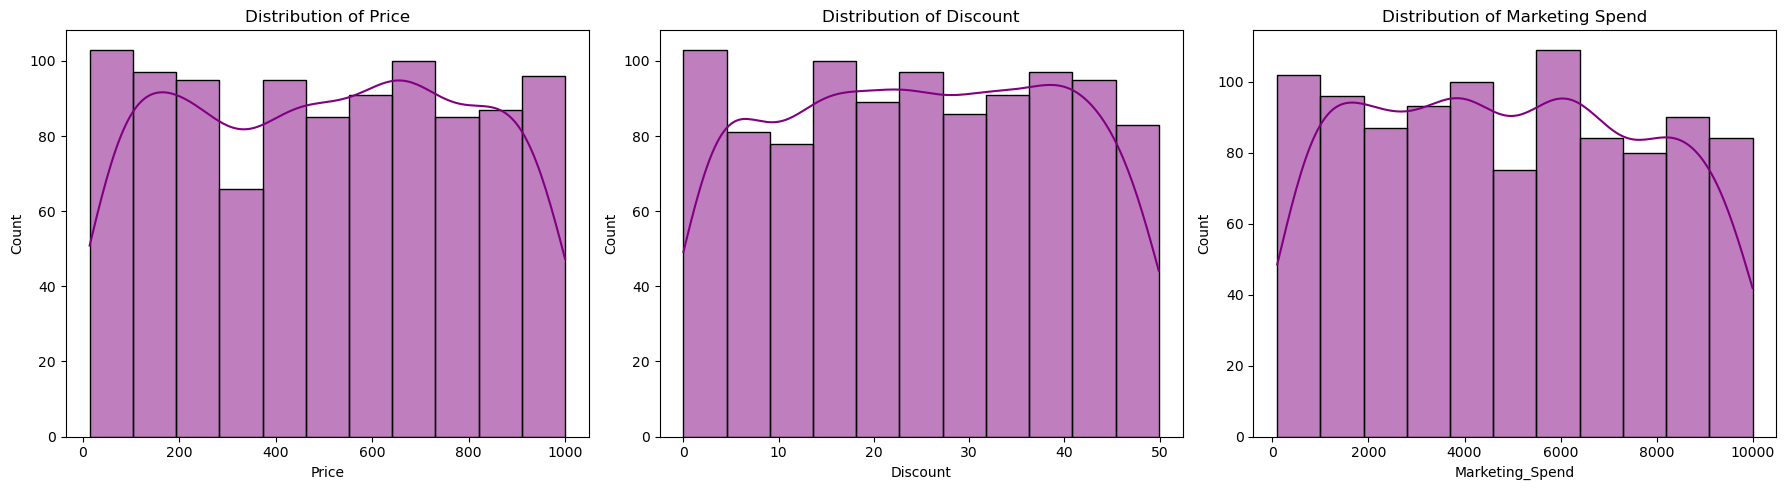

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribusi Price
sns.histplot(df['Price'], kde=True, color='purple', ax=axes[0])
axes[0].set_title('Distribution of Price')

# Distribusi Price
sns.histplot(df['Discount'], kde=True, color='purple', ax=axes[1])
axes[1].set_title('Distribution of Discount')

# Distribusi Price
sns.histplot(df['Marketing_Spend'], kde=True, color='purple', ax=axes[2])
axes[2].set_title('Distribution of Marketing Spend')

plt.tight_layout()
plt.show()

Insight:
- Tidak ada puncak yang dominan, yang menunjukkan bahwa harga produk mungkin cukup beragam di pasar.
- Ada sedikit peningkatan di sekitar harga menengah (600), yang bisa menunjukkan adanya preferensi pelanggan di rentang harga tersebut.
- Diskon di sekitar 20–40% cukup konsisten, yang mungkin berarti diskon di kisaran ini cukup menarik perhatian pelanggan.
- Pada Marketing Spend terdapat puncak di sekitar 6000, yang mungkin menunjukkan adanya strategi pemasaran yang cukup agresif di titik tersebut.

### Korelasi Antar Variabel

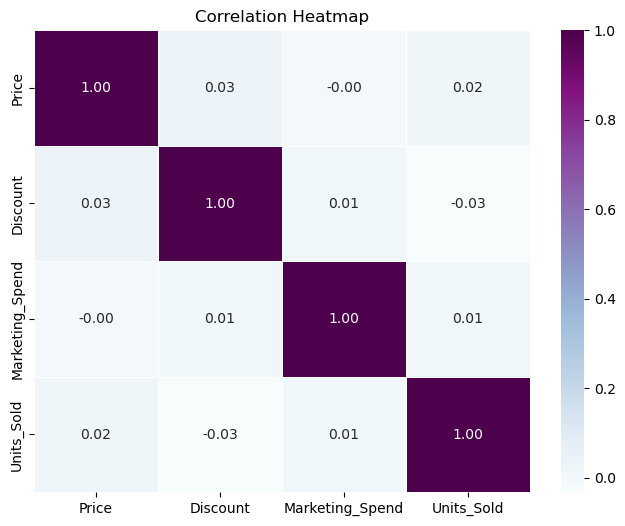

In [21]:
correlation = df[['Price', 'Discount', 'Marketing_Spend', 'Units_Sold']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Insight:
- Tidak ada hubungan linier yang kuat antar variabel kecuali antar dirinya sendiri (nilai korelasi = 1 pada diagonal).
- Strategi penetapan harga, diskon, dan pengeluaran pemasaran mungkin perlu ditinjau ulang karena tidak memberikan dampak langsung pada penjualan.
- Bisa jadi ada faktor eksternal yang lebih berpengaruh terhadap penjualan, diluar dari varibel diatas

### Performa Kategori Produk

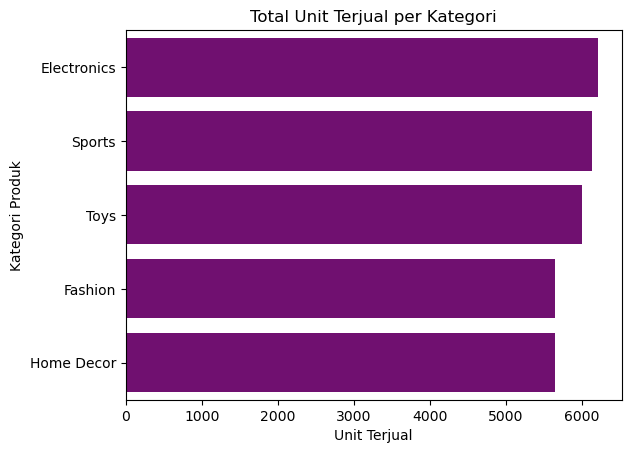

In [90]:
Category_Sales = df.groupby('Product_Category')['Units_Sold'].sum().reset_index()
Category_Sales = Category_Sales.sort_values(by='Units_Sold', ascending=False)

sns.barplot(x='Units_Sold', y='Product_Category', data=Category_Sales, color='Purple')
plt.title('Total Unit Terjual per Kategori')
plt.xlabel('Unit Terjual')
plt.ylabel('Kategori Produk')
plt.show()

Insight:
- Kontribusi penjualan terbesar adalah pada kategori produk Electronics dan terendah pada Home Decor

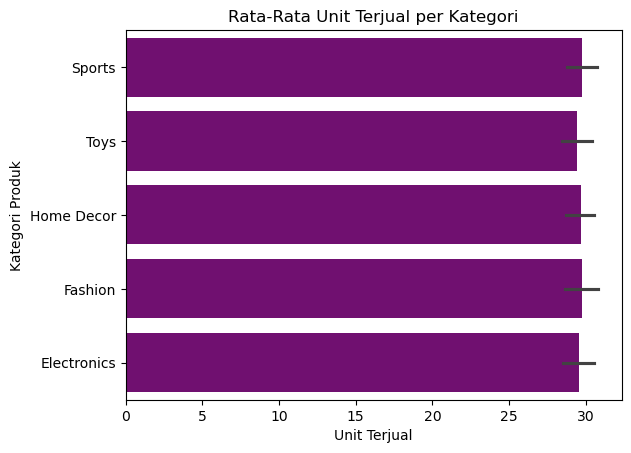

In [88]:
sns.barplot(x='Units_Sold', y='Product_Category', data=df, color='Purple')
plt.title('Rata-Rata Unit Terjual per Kategori')
plt.xlabel('Unit Terjual')
plt.ylabel('Kategori Produk')
plt.show()

### Performa Berdasarkan Segmen Pelanggan

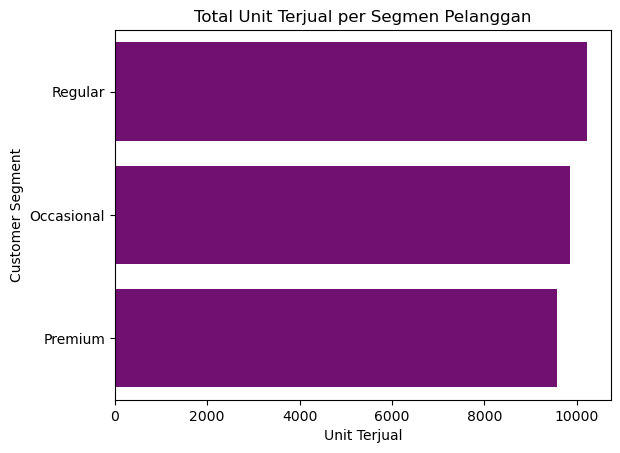

In [86]:
Segment_Sales = df.groupby('Customer_Segment')['Units_Sold'].sum().reset_index()
Segment_Sales = Segment_Sales.sort_values(by='Units_Sold', ascending=False)

sns.barplot(x='Units_Sold', y='Customer_Segment', data=Segment_Sales, color='purple')
plt.title('Total Unit Terjual per Segmen Pelanggan')
plt.xlabel('Unit Terjual')
plt.ylabel('Customer Segment')
plt.show()

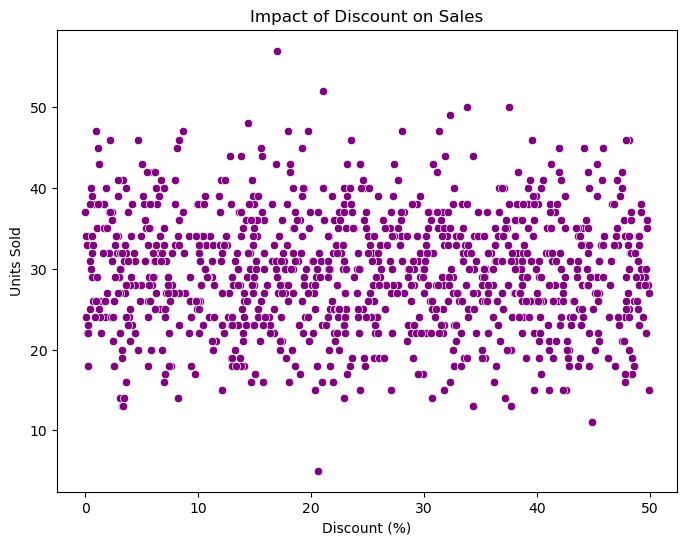

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Units_Sold', data=df, color='purple')
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Units Sold')
plt.show()

Insight:
- Titik-titik terlihat menyebar secara acak, yang artinya korelasi lemah atau tidak ada hubungan.
- Meski diskon bervariasi antara 0% hingga 50%, jumlah penjualan cenderung tetap dalam kisaran yang sama (sekitar 10–50 unit). Ini menunjukkan bahwa pemberian diskon tidak memberikan dampak besar pada penjualan.
- Terlihat ada kepadatan titik pada diskon di bawah 10% dan di atas 40%. Ini bisa menunjukkan bahwa produk dengan diskon kecil dan besar memiliki daya tarik tertentu bagi pelanggan.

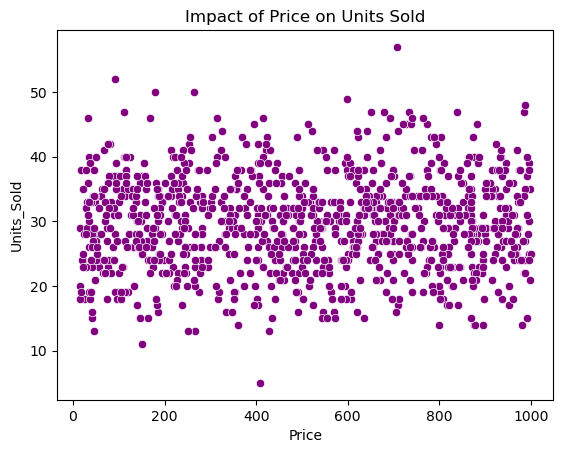

In [78]:
sns.scatterplot(x='Price', y='Units_Sold', data=df, color='purple')
plt.xlabel('Price')
plt.ylabel('Units_Sold')
plt.title('Impact of Price on Units Sold')
plt.show()

In [84]:
df[['Price', 'Units_Sold']].corr()

,Price,Units_Sold
Price,1.000000,0.015047
Units_Sold,0.015047,1.000000


In [108]:
#  Mengelompokkan data berdasarkan kategori produk dan segmen pelanggan serta menghitung total beberapa metrik
sales_by_category_segment = df.groupby(["Product_Category", "Customer_Segment"]).agg(
    Total_Sales=("Price", "sum"), 
    Total_Units_Sold=("Units_Sold", "sum"),
    Total_Marketing_Spend=("Marketing_Spend", "sum")
).reset_index()

### Analisis Total Penjualan per Kategori dan Segmen Pelanggan

C:\Users\Ivan\AppData\Local\Temp\ipykernel_14840\1350827511.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.barplot(x="Product_Category", y="Total_Sales", hue="Customer_Segment", data=sales_by_category_segment, color="purple")


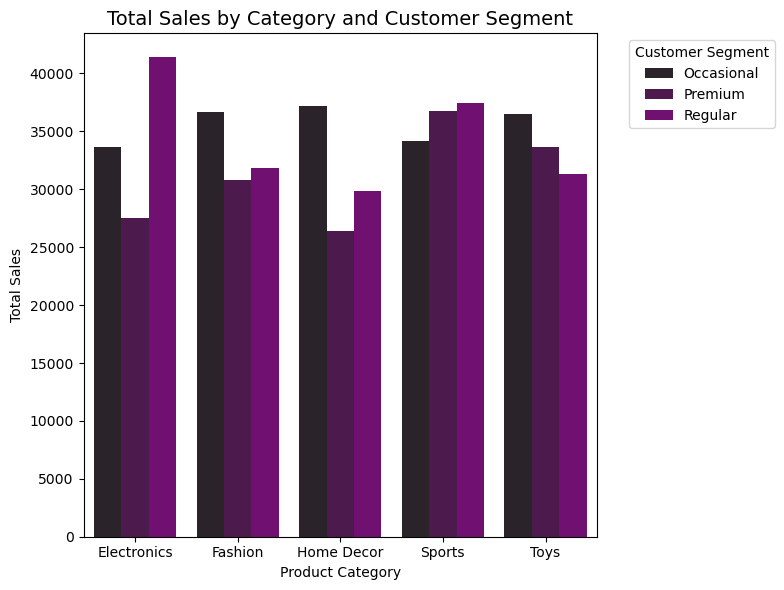

In [114]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Product_Category", y="Total_Sales", hue="Customer_Segment", data=sales_by_category_segment, color="purple")
plt.title("Total Sales by Category and Customer Segment", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

Insight:
- Ada segmen pelanggan yang mendominasi penjualan dengan angka tertinggi di kategori elektronik. Bisa jadi ada perbedaan strategi pemasaran atau preferensi pelanggan terhadap produk elektronik.
- Kategori "Sports" menunjukkan performa penjualan yang relatif kuat dan stabil. Tidak ada perbedaan signifikan antar segmen pelanggan, yang menunjukkan bahwa produk sports memiliki daya tarik yang luas.
- Kategori "Home Decor" memiliki penjualan lebih rendah dibanding kategori lain. Mungkin ini karena produk dalam kategori ini memiliki siklus pembelian 
- Kategori "Electronics" yang memiliki segmen pelanggan dengan penjualan tinggi, tapi juga ada segmen dengan penjualan lebih rendah. Perusahaan bisa melakukan strategi targeted marketing untuk meningkatkan penjualan di segmen yang lebih lemah.

C:\Users\Ivan\AppData\Local\Temp\ipykernel_14840\872815949.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.barplot(x="Product_Category", y="Total_Marketing_Spend", hue="Customer_Segment", data=sales_by_category_segment, color="purple")


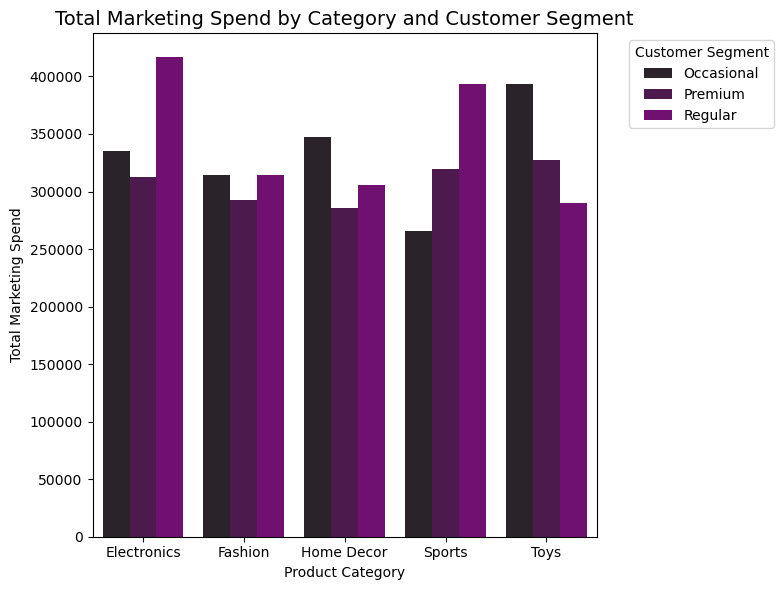

In [116]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Product_Category", y="Total_Marketing_Spend", hue="Customer_Segment", data=sales_by_category_segment, color="purple")
plt.title("Total Marketing Spend by Category and Customer Segment", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Total Marketing Spend")
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

Insight:
- Kategori "Electronics" memiliki pengeluaran pemasaran tertinggi di salah satu segmennya. Ini bisa jadi indikasi bahwa segmen tersebut memiliki potensi revenue besar atau membutuhkan lebih banyak upaya pemasaran untuk menarik pembeli.
- Kategori "Sports" menunjukkan variasi signifikan dalam pengeluaran pemasaran. Salah satu segmen mendapatkan alokasi pemasaran yang jauh lebih besar dibanding segmen lain. Dan dapat dilihat perbandingan dari analisis sebelumnya bahwa startegi ini tidak signifikan dalam meningkatkan penjualan. Perusahaan bisa mengalokasikan dana marketing pada kategori ini ke yang lain agar lebih efektif dalam mengelola budget marketing.
- Kategori "Home Decor" memiliki pengeluaran pemasaran yang lebih rendah dibanding kategori lain. Mungkin produk dalam kategori ini lebih mengandalkan strategi pemasaran organik atau word-of-mouth dibanding iklan langsung. Bisa juga ada asumsi bahwa pelanggan kategori ini memiliki loyalitas yang lebih tinggi, sehingga tidak membutuhkan banyak pemasaran.

### Sales Forecasting Menggunakan Prophet

In [154]:
!pip install prophet
from prophet import Prophet

In [144]:
#  Mengelompokkan data berdasarkan Date serta menghitung total beberapa metrik
sales_by_time = df.groupby("Date").agg(
    Total_Sales=("Price", "sum"),
    Total_Units_Sold=("Units_Sold", "sum"),
    Total_Marketing_Spend=("Marketing_Spend", "sum")
).reset_index()

12:51:31 - cmdstanpy - INFO - Chain [1] start processing
12:51:31 - cmdstanpy - INFO - Chain [1] done processing


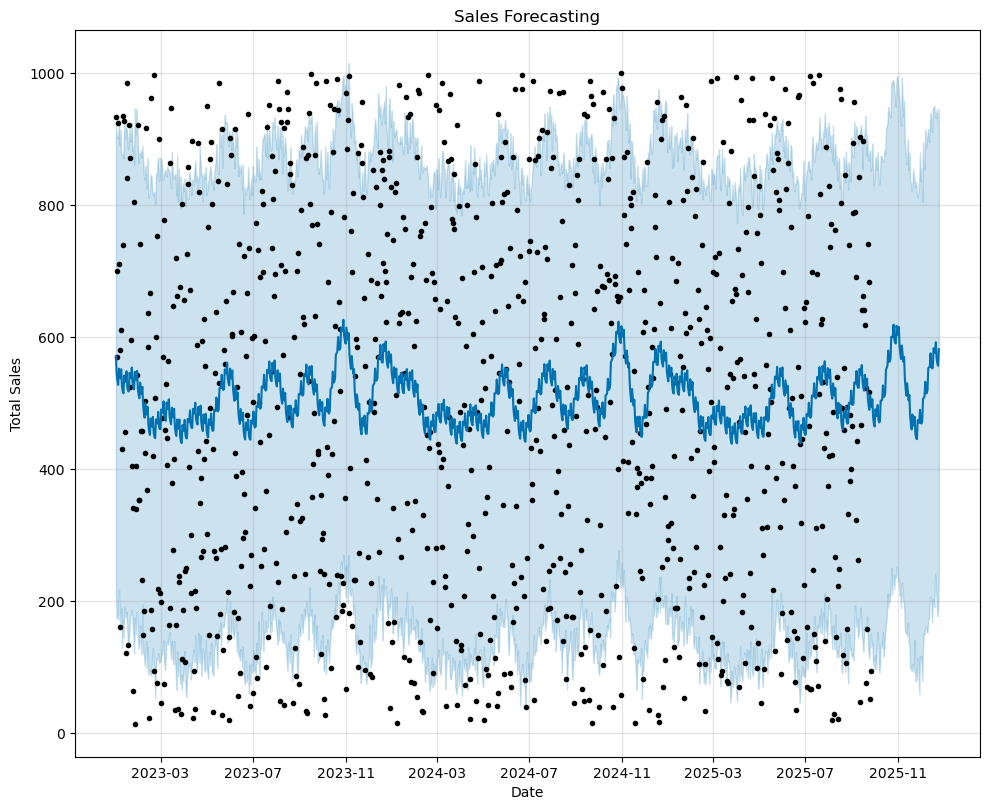

,ds,yhat,yhat_lower,yhat_upper
1080,2025-12-16,552.460261,167.871425,910.299573
1081,2025-12-17,553.347526,202.985348,945.607088
1082,2025-12-18,583.045430,200.760956,948.054141
1083,2025-12-19,579.989953,190.815714,949.885700
1084,2025-12-20,576.108501,241.639012,934.141515
1085,2025-12-21,592.025110,218.822309,931.700767
1086,2025-12-22,567.380487,202.719268,943.788679
1087,2025-12-23,559.910717,177.028964,930.689397
1088,2025-12-24,556.228539,188.859766,928.621050
1089,2025-12-25,581.532916,239.150041,945.653506


In [152]:
# Rename agar cocok dengan Prophet
df1 = sales_by_time.rename(columns={'Date': 'ds', 'Total_Sales': 'y'})

# Pastikan kolom ds dalam format datetime
df1['ds'] = pd.to_datetime(df1['ds'])

# Inisialisasi model Prophet
model = Prophet()
model.fit(df1)

# Buat DataFrame untuk prediksi 90 hari ke depan
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Visualisasi hasil prediksi
fig = model.plot(forecast, figsize=(10,8))
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Menampilkan prediksi 10 hari pertama
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

ds → Tanggal prediksi
yhat → Prediksi total sales
yhat_lower → Batas bawah prediksi (interval kepercayaan)
yhat_upper → Batas atas prediksi

Insight (Berdasarkan prediksi 10 hari ke depan):
- Penjualan dalam beberapa hari ke depan diperkirakan stabil di kisaran 550 - 600 unit.  
- Rentang yhat_lower dan yhat_upper menunjukkan interval kepercayaan, menandakan kemungkinan variasi dalam prediksi.
- Rentang prediksi cukup lebar, terutama pada yhat_lower yang menunjukkan potensi penurunan hingga sekitar 167 unit pada 16 Desember 2025. Ini bisa menjadi indikator bahwa faktor eksternal seperti musiman, tren pasar, atau strategi pemasaran dapat memengaruhi penjualan.
- Manajemen Persediaan:
   - Dengan prediksi penjualan di kisaran 550 - 600 unit, perusahaan bisa mengoptimalkan stok barang agar tidak terjadi overstock atau stockout.  
   - Jika variasi prediksi tinggi (lihat yhat_lower dan yhat_upper), sebaiknya ada buffer stock untuk mengantisipasi lonjakan permintaan.  
- Optimalisasi Promosi: 
   - Jika tren menunjukkan potensi penurunan sales dalam beberapa hari ke depan, bisa dilakukan promo diskon, flash sale, atau campaign marketing untuk meningkatkan penjualan.  
   - Sebaliknya, jika tren naik, strategi yang lebih baik mungkin mempertahankan harga dan memanfaatkan momentum permintaan tinggi.  
- Perencanaan SDM & Operasional:  
   - Jika bisnis melibatkan logistik atau tenaga kerja, tren prediksi ini bisa membantu menyesuaikan jumlah tenaga kerja sesuai dengan volume permintaan yang diprediksi.  
- Evaluasi Faktor Eksternal:
   - Jika prediksi menunjukkan pola yang berbeda dari tren historis, perlu dianalisis apakah ada faktor eksternal seperti hari libur, tren pasar, atau persaingan bisnis yang perlu diantisipasi.

In [168]:
# Pisahkan data menjadi train dan test set
train = df1.iloc[:-30]  # Gunakan data kecuali 30 hari terakhir untuk training
test = df1.iloc[-30:]   # Gunakan 30 hari terakhir untuk pengujian

# Inisialisasi dan fit model Prophet dengan data training
model = Prophet()
model.fit(train)

# Buat DataFrame untuk prediksi sesuai dengan periode data testing
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Gabungkan prediksi dengan data aktual
result = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds')
result.head()

16:50:18 - cmdstanpy - INFO - Chain [1] start processing
16:50:20 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,y
0,2025-08-28,476.425207,739.98
1,2025-08-29,473.508274,481.26
2,2025-08-30,471.681795,382.13
3,2025-08-31,489.027512,400.53
4,2025-09-01,464.196545,464.85


In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Hitung MAE
mae = mean_absolute_error(result['y'], result['yhat'])

# Hitung MSE
mse = mean_squared_error(result['y'], result['yhat'])

# Hitung RMSE
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 229.06
MSE: 78980.76
RMSE: 281.04
